In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [11]:
import os
import cv2

In [12]:
selected_classes = ['Salak 1', 'Apricot 1', 'Avocado 1', 'Banana 1', 'Cherry 2'] 

In [14]:
def load_and_preprocess_image(file_path, target_size=(100, 100)):
    try:
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)  
        return img.flatten()  
    except Exception as e:
        print(f"Error loading image {file_path}: {e}")
        return None

def load_images_with_classes(directory, selected_classes):
    images, labels, class_names = [], [], []
    class_map = {}

    for i, class_name in enumerate(selected_classes):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue  
        class_map[class_name] = i
        class_names.append(class_name)
        for file_name in os.listdir(class_dir):
            file_path = os.path.join(class_dir, file_name)
            if file_name.endswith(".jpg"):
                img = load_and_preprocess_image(file_path)
                if img is not None:
                    images.append(img)
                    labels.append(i)
    
    return np.array(images), np.array(labels), class_names
    

In [15]:
train_dir = r"C:\Users\DELL\Downloads\machineWithPython\fruitsDataSet\fruits-360_dataset_100x100\fruits-360\Training"
test_dir = r"C:\Users\DELL\Downloads\machineWithPython\fruitsDataSet\fruits-360_dataset_100x100\fruits-360\Test"
train_images, train_labels, class_names = load_images_with_classes(train_dir, selected_classes)
test_images, test_labels, _ = load_images_with_classes(test_dir, selected_classes)

In [26]:
print(f"X_train shape: {train_images.shape}")
print(f"y_train shape: {test_images.shape}")

X_train shape: (2637, 10000)
y_train shape: (881, 10000)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [120]:
# Normalizing the data by dividing by 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

In [121]:
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

In [122]:

print("تدريب النموذج")
model.fit(X_train, y_train)

تدريب النموذج


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [123]:
val_predictions = model.predict(X_val)
val_predictions

array([4, 3, 2, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 0, 4, 3, 3, 4,
       2, 2, 4, 0, 4, 1, 1, 2, 3, 1, 4, 2, 0, 4, 2, 0, 2, 1, 4, 2, 3, 3,
       0, 1, 3, 0, 0, 4, 0, 1, 0, 3, 4, 0, 3, 2, 4, 4, 3, 1, 1, 4, 2, 1,
       4, 4, 4, 1, 0, 4, 1, 3, 4, 2, 4, 1, 0, 4, 4, 2, 3, 1, 3, 4, 3, 3,
       2, 1, 1, 0, 3, 3, 3, 4, 0, 2, 0, 0, 1, 4, 4, 3, 0, 3, 4, 4, 3, 1,
       0, 4, 0, 1, 4, 0, 1, 2, 1, 4, 4, 2, 1, 0, 4, 4, 0, 1, 0, 3, 4, 1,
       4, 2, 2, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 1, 1, 2, 4, 2, 3, 3, 1,
       3, 2, 3, 1, 2, 0, 0, 4, 4, 3, 1, 4, 3, 4, 4, 4, 1, 1, 3, 1, 1, 1,
       3, 1, 4, 2, 3, 4, 4, 4, 4, 1, 2, 4, 4, 1, 0, 4, 2, 2, 1, 4, 0, 4,
       4, 4, 0, 1, 4, 4, 4, 3, 3, 3, 4, 0, 1, 1, 3, 0, 0, 4, 4, 4, 1, 3,
       0, 1, 4, 0, 2, 1, 4, 1, 3, 0, 3, 3, 1, 2, 3, 2, 4, 4, 2, 0, 2, 1,
       0, 3, 1, 3, 3, 1, 2, 1, 0, 4, 4, 2, 4, 4, 3, 3, 3, 2, 1, 4, 0, 1,
       4, 4, 0, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 1, 4, 4, 3, 0, 3, 3, 4, 4,
       4, 2, 4, 0, 1, 3, 1, 4, 2, 4, 3, 4, 0, 2, 4,

In [124]:
print("تقييم على مجموعة التحقق:")
print(classification_report(y_val, val_predictions, target_names=class_names))


تقييم على مجموعة التحقق:
              precision    recall  f1-score   support

     Salak 1       1.00      1.00      1.00       103
   Apricot 1       1.00      1.00      1.00        93
   Avocado 1       1.00      1.00      1.00        79
    Banana 1       1.00      1.00      1.00       101
    Cherry 2       1.00      1.00      1.00       152

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [125]:
y_pred = model.predict(X_test)
y_pred

array([4, 3, 2, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 0, 4, 3, 3, 4,
       2, 2, 4, 0, 4, 1, 1, 2, 3, 1, 4, 2, 0, 4, 2, 0, 2, 1, 4, 2, 3, 3,
       0, 1, 3, 0, 0, 4, 0, 1, 0, 3, 4, 0, 3, 2, 4, 4, 3, 1, 1, 4, 2, 1,
       4, 4, 4, 1, 0, 4, 1, 3, 4, 2, 4, 1, 0, 4, 4, 2, 3, 1, 3, 4, 3, 3,
       2, 1, 1, 0, 3, 3, 3, 4, 0, 2, 0, 0, 1, 4, 4, 3, 0, 3, 4, 4, 3, 1,
       0, 4, 0, 1, 4, 0, 1, 2, 1, 4, 4, 2, 1, 0, 4, 4, 0, 1, 0, 3, 4, 1,
       4, 2, 2, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 1, 1, 2, 4, 2, 3, 3, 1,
       3, 2, 3, 1, 2, 0, 0, 4, 4, 3, 1, 4, 3, 4, 4, 4, 1, 1, 3, 1, 1, 1,
       3, 1, 4, 2, 3, 4, 4, 4, 4, 1, 2, 4, 4, 1, 0, 4, 2, 2, 1, 4, 0, 4,
       4, 4, 0, 1, 4, 4, 4, 3, 3, 3, 4, 0, 1, 1, 3, 0, 0, 4, 4, 4, 1, 3,
       0, 1, 4, 0, 2, 1, 4, 1, 3, 0, 3, 3, 1, 2, 3, 2, 4, 4, 2, 0, 2, 1,
       0, 3, 1, 3, 3, 1, 2, 1, 0, 4, 4, 2, 4, 4, 3, 3, 3, 2, 1, 4, 0, 1,
       4, 4, 0, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 1, 4, 4, 3, 0, 3, 3, 4, 4,
       4, 2, 4, 0, 1, 3, 1, 4, 2, 4, 3, 4, 0, 2, 4,

In [126]:
print("تقييم على مجموعة الاختبار:")
print(classification_report(y_test, y_pred, target_names=class_names))

تقييم على مجموعة الاختبار:
              precision    recall  f1-score   support

     Salak 1       1.00      1.00      1.00       103
   Apricot 1       1.00      1.00      1.00        93
   Avocado 1       1.00      1.00      1.00        79
    Banana 1       1.00      1.00      1.00       101
    Cherry 2       1.00      1.00      1.00       152

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [127]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

1.0

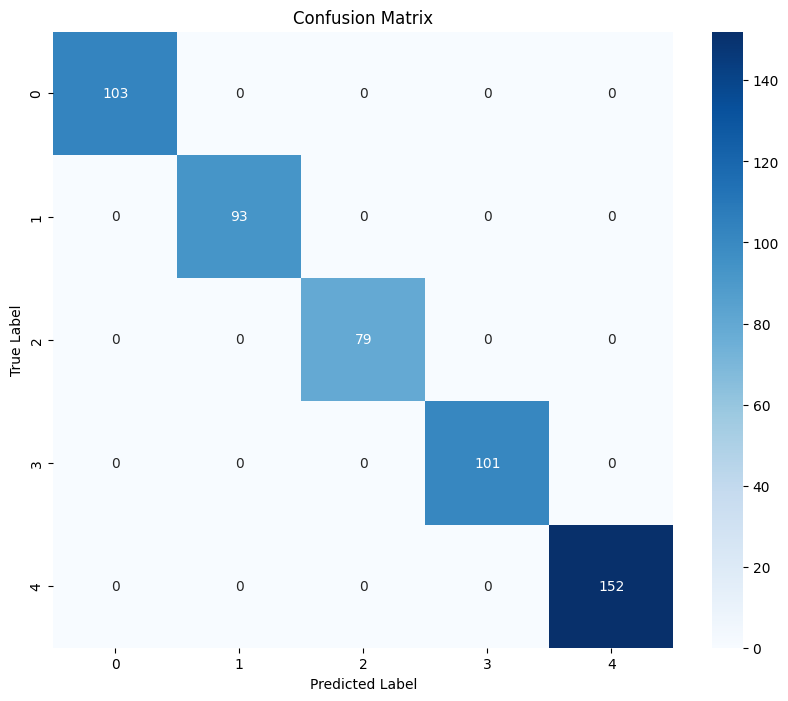

In [128]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [129]:
history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}
for epoch in range(1, 51):
    model.set_params(max_iter=epoch)
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_loss = log_loss(y_train, y_train_pred)
    val_loss = log_loss(y_test, y_test_pred)
    
    history['train_acc'].append(train_acc)
    history['val_acc'].append(val_acc)
    history['train_loss'].append(train_loss)
    history['val_loss'].append(val_loss)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class'

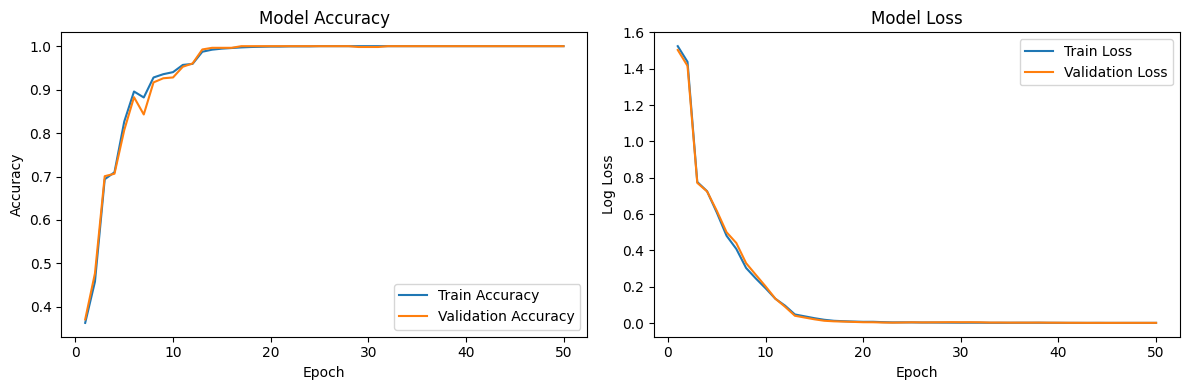

In [130]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 51), history['train_acc'], label='Train Accuracy', color='tab:blue')
ax1.plot(range(1, 51), history['val_acc'], label='Validation Accuracy', color='tab:orange')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 51), history['train_loss'], label='Train Loss', color='tab:blue')
ax2.plot(range(1, 51), history['val_loss'], label='Validation Loss', color='tab:orange')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class'

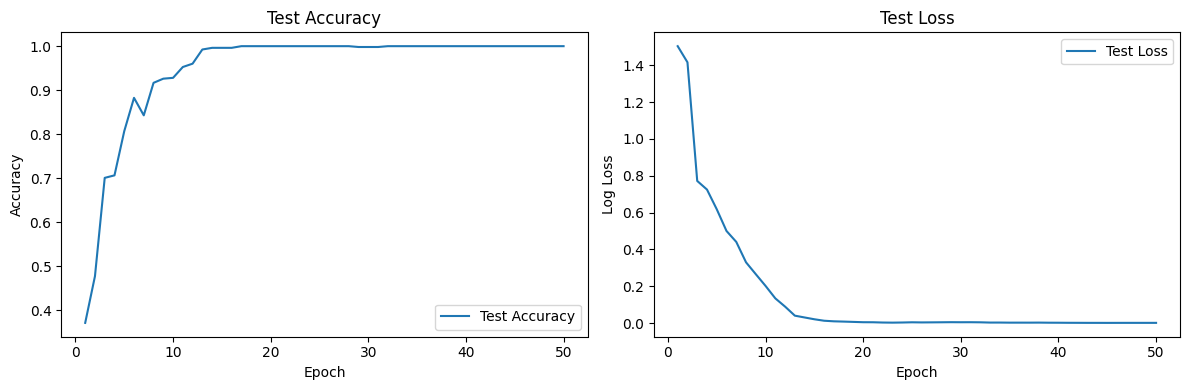

In [131]:
history = {'test_loss': [], 'test_acc': []}

for epoch in range(1, 51):
    model.set_params(max_iter=epoch)
    model.fit(X_train, y_train)
    
    y_test_pred = model.predict_proba(X_test)
    
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    test_loss = log_loss(y_test, y_test_pred)
    
    history['test_acc'].append(test_acc)
    history['test_loss'].append(test_loss)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(range(1, 51), history['test_acc'], label='Test Accuracy', color='tab:blue')
ax1.set_title('Test Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(range(1, 51), history['test_loss'], label='Test Loss', color='tab:blue')
ax2.set_title('Test Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Log Loss')
ax2.legend()

plt.tight_layout()
plt.show()


In [132]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [133]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 0], pos_label=0)
roc_auc = auc(fpr, tpr)


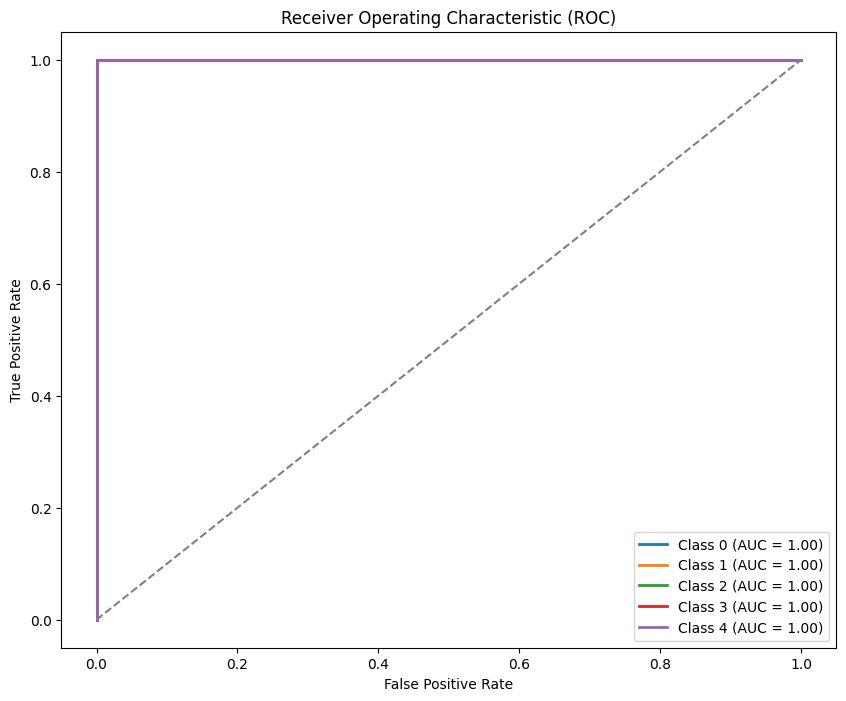

In [134]:
plt.figure(figsize=(10, 8))

for i in range(y_pred_proba.shape[1]):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()


In [135]:
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")


AUC: 1.00


In [136]:
print("y_pred_proba:", y_pred_proba[:5])


y_pred_proba: [[3.65135731e-067 2.34249436e-020 8.10873886e-035 8.80715899e-127
  1.00000000e+000]
 [8.13422080e-179 3.27104562e-212 0.00000000e+000 1.00000000e+000
  1.31011685e-216]
 [6.73602338e-057 7.10984067e-143 1.00000000e+000 1.40597284e-216
  2.32964522e-105]
 [1.00000000e+000 1.66610395e-031 8.40632428e-058 5.14640717e-129
  3.12929914e-037]
 [1.35168873e-066 5.31776590e-039 2.52830758e-056 9.43779174e-108
  1.00000000e+000]]


In [137]:
print("Distribution of predicted probabilities:", np.max(y_pred_proba, axis=1))


Distribution of predicted probabilities: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99999991 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.99999992 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1. 

In [138]:
log_reg = LogisticRegression(penalty ='l1' ,solver='liblinear',max_iter=100)  
log_reg.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [139]:
y_pred_log = log_reg.predict(X_test)
y_pred_log

array([4, 3, 2, 0, 4, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 2, 4, 0, 4, 3, 3, 4,
       2, 2, 4, 0, 4, 1, 1, 2, 3, 1, 4, 2, 0, 4, 2, 0, 2, 1, 4, 2, 3, 3,
       0, 1, 3, 0, 0, 4, 0, 1, 0, 3, 4, 0, 3, 2, 4, 4, 3, 1, 1, 4, 2, 1,
       4, 4, 4, 1, 0, 4, 1, 3, 4, 2, 4, 1, 0, 4, 4, 2, 3, 1, 3, 4, 3, 3,
       2, 1, 1, 0, 3, 3, 3, 4, 0, 2, 0, 0, 1, 4, 4, 3, 0, 3, 4, 4, 3, 1,
       0, 4, 0, 1, 4, 0, 1, 2, 1, 4, 4, 2, 1, 0, 4, 4, 0, 1, 0, 3, 4, 1,
       4, 2, 2, 4, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 1, 1, 2, 4, 2, 3, 3, 1,
       3, 2, 3, 1, 2, 0, 0, 4, 4, 3, 1, 4, 3, 4, 4, 4, 1, 1, 3, 1, 1, 1,
       3, 1, 4, 2, 3, 4, 4, 4, 4, 1, 2, 4, 4, 1, 0, 4, 2, 2, 1, 4, 0, 4,
       4, 4, 0, 1, 4, 4, 4, 3, 3, 3, 4, 0, 1, 1, 3, 0, 0, 4, 4, 4, 1, 3,
       0, 1, 4, 0, 2, 1, 4, 1, 3, 0, 3, 3, 1, 2, 3, 2, 4, 4, 2, 0, 2, 1,
       0, 3, 1, 3, 3, 1, 2, 1, 0, 4, 4, 2, 4, 4, 3, 3, 3, 2, 1, 4, 0, 1,
       4, 4, 0, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 1, 4, 4, 3, 0, 3, 3, 4, 4,
       4, 2, 4, 0, 1, 3, 1, 4, 2, 4, 3, 4, 0, 2, 4,

In [140]:
print("تقييم على مجموعة الاختبار:")
print(classification_report(y_test, y_pred, target_names=class_names))

تقييم على مجموعة الاختبار:
              precision    recall  f1-score   support

     Salak 1       1.00      1.00      1.00       103
   Apricot 1       1.00      1.00      1.00        93
   Avocado 1       1.00      1.00      1.00        79
    Banana 1       1.00      1.00      1.00       101
    Cherry 2       1.00      1.00      1.00       152

    accuracy                           1.00       528
   macro avg       1.00      1.00      1.00       528
weighted avg       1.00      1.00      1.00       528



In [141]:
train_loss = log_loss(y_train, log_reg.predict_proba(X_train))
val_loss = log_loss(y_test, log_reg.predict_proba(X_test))

print(train_loss)
print(val_loss)

0.023048547547364948
0.029005029806971668


In [142]:
def predict_new_image(model, image_path, class_names):
    img = load_and_preprocess_image(image_path, target_size=(100, 100))
    if img is None:
        print("can not load this image")
        return None
    
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)
    predicted_index = prediction[0]
    
    predicted_class = class_names[predicted_index]
    print(f"prediction: {predicted_class}")
    return predicted_class
image_path = r"C:\\Users\\DELL\\Downloads\\machineWithPython\\salakt.webp"  # ضعي مسار الصورة الجديدة هنا
predicted_class = predict_new_image(model, image_path, class_names)


prediction: Salak 1


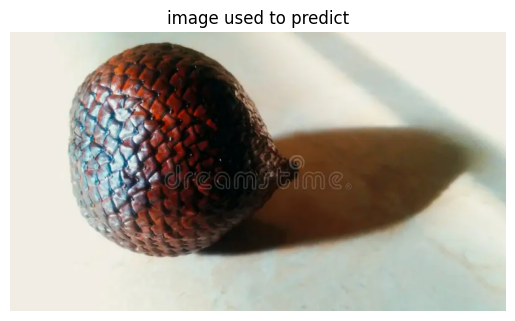

In [143]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.title("image used to predict")
plt.show()


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

log_reg = LogisticRegression(max_iter=1000, multi_class='ovr')
log_reg.fit(X_train, y_train)

y_pred_prob = log_reg.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f'ROC AUC on Test Set: {roc_auc:.2f}')


C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


ROC AUC on Test Set: 1.00
